In [79]:
import numpy as np
import pandas as pd
import seaborn as sns

In [80]:
df = pd.read_csv("spam.csv", encoding="latin1")


In [81]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
df.shape

(5572, 5)

Data cleaning

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [84]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [85]:
df.sample(5)

,v1,v2
3979,spam,ringtoneking 84484
1766,spam,SMS AUCTION You have won a Nokia 7250i. This i...
902,ham,I wonder if your phone battery went dead ? I h...
388,spam,4mths half price Orange line rental & latest c...
5453,ham,Except theres a chick with huge boobs.


In [86]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1770,ham,Dont show yourself. How far. Put new pictures ...
5228,spam,PRIVATE! Your 2003 Account Statement for <fone...
877,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
3206,ham,This phone has the weirdest auto correct.
4514,ham,That was random saw my old roomate on campus. ...


In [87]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [88]:
df['target']=encoder.fit_transform(df['target']) #assigning spam to 1 and ham to 0

In [89]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [91]:
#duplicate values
df.duplicated().sum()

np.int64(403)

In [92]:
df=df.drop_duplicates(keep='first')

In [93]:
df.shape

(5169, 2)

EDA(exploratry data analysis)

In [94]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

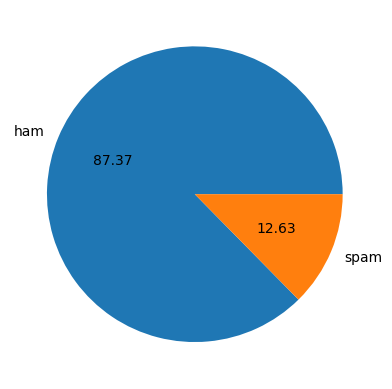

In [96]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [97]:
!pip install nltk


In [98]:
import nltk

In [99]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\DIVYESH/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [100]:
df['num_char']=df['text'].apply(len)

In [101]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [102]:
# df['text'].apply(lambda x:nltk.word_tokenize(x))
import nltk
nltk.download('punkt', download_dir='C:\\Users\\DIVYESH\\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\DIVYESH\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to C:\Users\DIVYESH/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DIVYESH/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DIVYESH/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [104]:
from nltk.tokenize import word_tokenize


In [105]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [106]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [108]:
df.head()

,target,text,num_char,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [109]:

df[['num_char','num_word','num_sentences']].describe()

,num_char,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [110]:
df[df['target']==0] [['num_char','num_word','num_sentences']].describe() #data of ham

,num_char,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [111]:
df[df['target']==1] [['num_char','num_word','num_sentences']].describe() #data of spam

,num_char,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

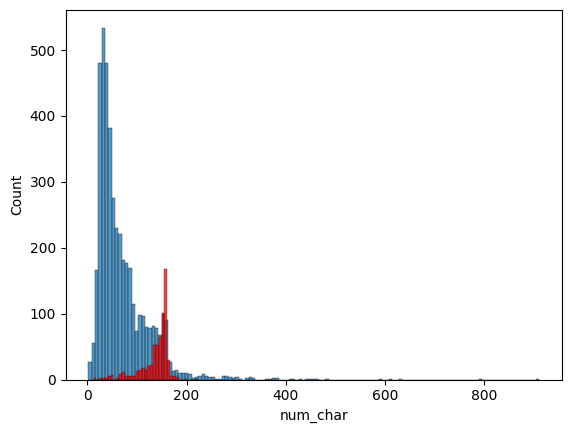

In [112]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

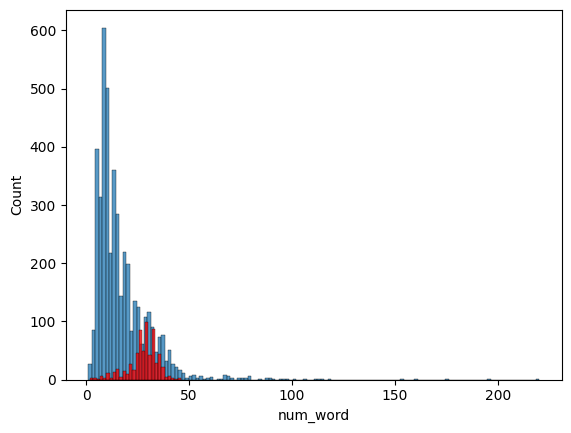

In [113]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

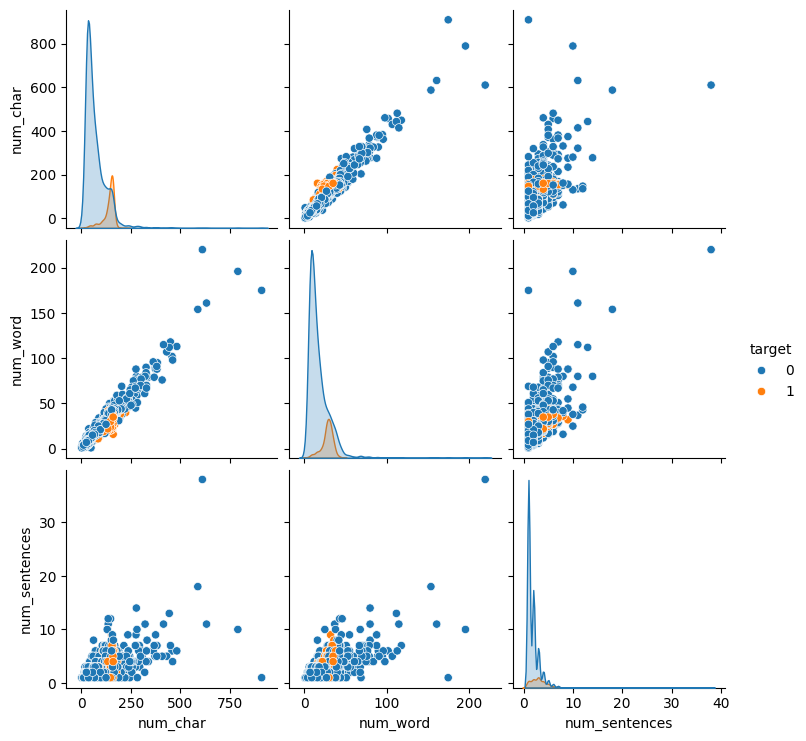

In [114]:
sns.pairplot(df, hue='target')

<Axes: >

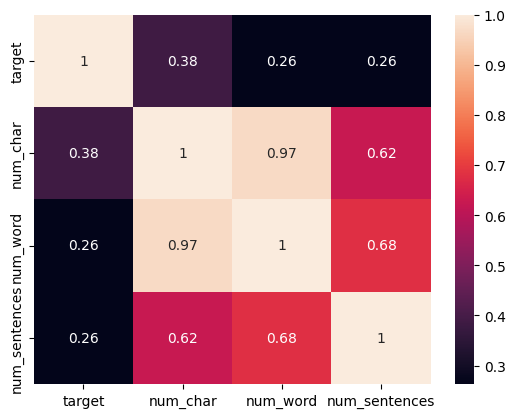

In [115]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


Data preprocessing
- lower case
- tokenization
- removing special char
- removing stop words and punctuation
- stemming

In [116]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [117]:
def transform_txt(text):
    text= text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(PorterStemmer().stem(i))
    return " ".join(y)

In [118]:
transform_txt('I am enjoying machine learning')

'enjoy machin learn'

In [119]:
df['transformed_text']=df['text'].apply(transform_txt)

In [120]:
df.head()

,target,text,num_char,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [121]:
!pip install wordcloud

In [122]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [123]:
spam_wc=wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

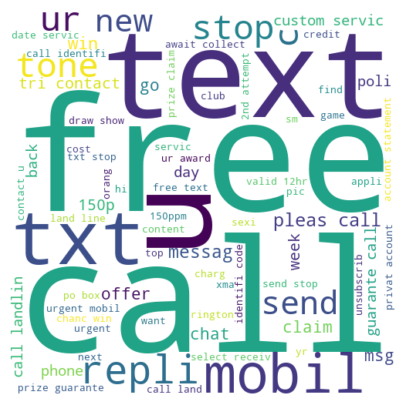

In [124]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')

In [125]:
ham_wc=wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep=" "))

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

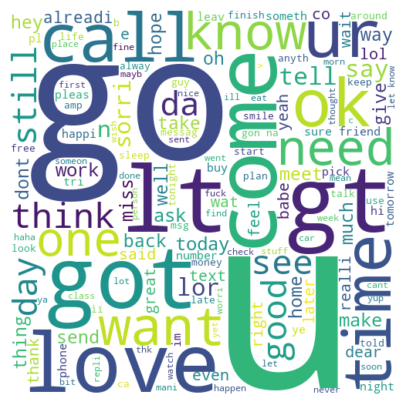

In [126]:
plt.figure(figsize=(10,5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')

In [127]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [128]:
len(spam_corpus)

9939

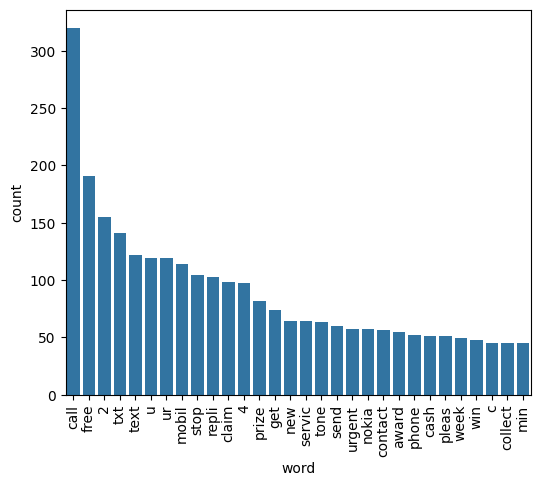

In [129]:
from collections import Counter
top = pd.DataFrame(Counter(spam_corpus).most_common(30))
top.columns = ['word', 'count']

plt.figure(figsize=(6,5))
sns.barplot(x='word', y='count', data=top)
plt.xticks(rotation=90)
plt.show()

In [130]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [131]:
len(ham_corpus)

35404

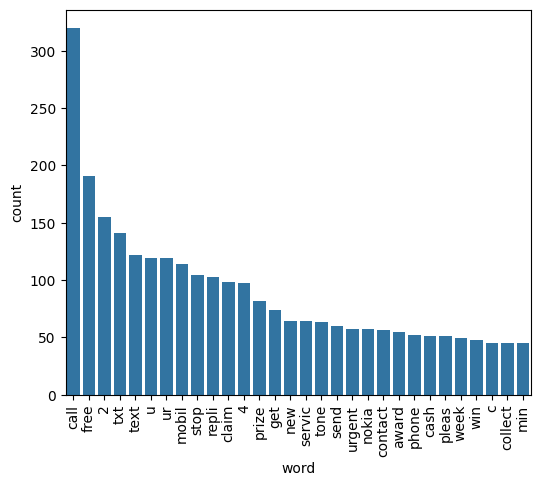

In [132]:
top2 = pd.DataFrame(Counter(ham_corpus).most_common(30))
top2.columns = ['word', 'count']

plt.figure(figsize=(6,5))
sns.barplot(x='word', y='count', data=top)
plt.xticks(rotation=90)
plt.show()

Model Building

In [133]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [134]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [135]:
x.shape

(5169, 6708)

In [136]:
y=df['target'].values

In [137]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [140]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [141]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [142]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [143]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [144]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
